In [9]:
import urllib.request, urllib.error, urllib.parse
import json
import os
from pprint import pprint
from urllib.parse import quote
import time

In [5]:
REST_URL = "http://3.88.197.71:8080"

In [6]:
API_KEY = "9b01b1cd-696d-4ef5-ac36-0b212f44599a"

In [7]:
def get_json(url):
    opener = urllib.request.build_opener()
    opener.addheaders = [('Authorization', 'apikey token=' + API_KEY)]
    return json.loads(opener.open(url).read())

### Don'f know if the service has the caching component

* AWS m6a.large

1. Latency of querying one ontology object

In [49]:
term = quote('Quality')
ontology = quote('IOT-STREAM')

In [50]:
latency_a = 0
for i in range(100):
    start_time = time.time()
    search_results=get_json(REST_URL + "/search?q=" + term + "&ontologies="+ontology)["collection"]
    end_time = time.time()
    latency_a += (end_time - start_time)

latency_a = latency_a/100
print(f"Latency of querying one ontology object: {latency_a:.4f} second")

Latency of querying one ontology object: 0.0629 second


2. Throughput of querying one ontology object

In [51]:
x_a = []
result_a = []

for i in range(100):
    second = 1
    x_a.append( i + 1 )
    count = 0
    while second >=0 :
        start_time = time.time()
        search_results=get_json(REST_URL + "/search?q=" + term + "&ontologies="+ontology)["collection"]
        end_time = time.time()
        second -= (end_time - start_time)
        count += 1
    result_a.append(int(count))

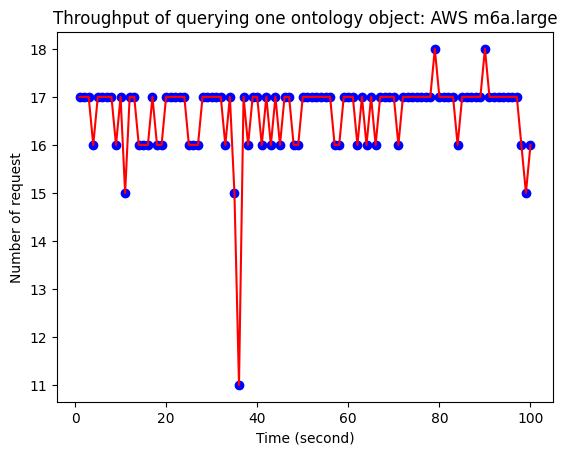

In [52]:
import matplotlib.pyplot as plt


# Create scatter plot
plt.scatter(x_a, result_a, color='blue', marker='o')
plt.plot(x_a, result_a, color='red')
# Add title and labels
plt.title("Throughput of querying one ontology object: AWS m6a.large")
plt.xlabel("Time (second)")
plt.ylabel("Number of request")

# Display the plot
plt.show()

3. network bandwidth

In [60]:
import threading
import time

In [65]:
time_list_a = []
def worker():
    search_results=get_json(REST_URL + "/search?q=" + term + "&ontologies="+ontology)["collection"]
    

In [66]:
def multi_threaded_method(num_threads):
    
    threads = []
    
    start_time = time.time()
    for i in range(num_threads):
        # Create a new thread and add it to the threads list
        thread = threading.Thread(target=worker)
        threads.append(thread)
        thread.start()

    # Wait for all threads to complete
    for thread in threads:
        thread.join()
    end_time = time.time()
    time_list_a.append(end_time - start_time)

In [67]:
thread_number_a = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
for i in thread_number_a:
    multi_threaded_method(i)


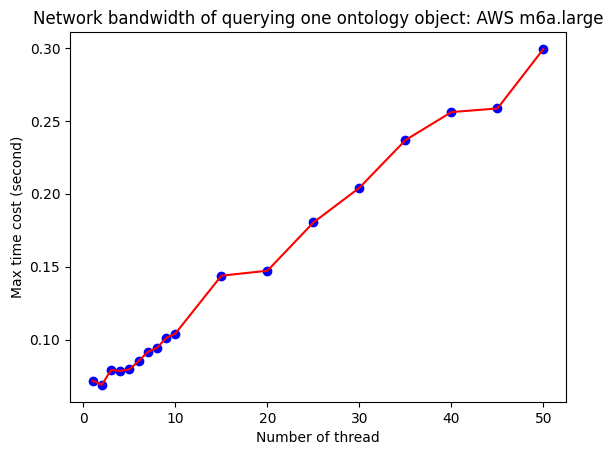

In [68]:

# Create scatter plot
plt.scatter(thread_number_a, time_list_a, color='blue', marker='o')
plt.plot(thread_number_a, time_list_a, color='red')
# Add title and labels
plt.title("Network bandwidth of querying one ontology object: AWS m6a.large")
plt.xlabel("Number of thread")
plt.ylabel("Max time cost (second)")

# Display the plot
plt.show()

* AWS t2.medium

In [73]:
REST_URL = "http://52.87.226.71:8080"

In [74]:
API_KEY = '8b4452d1-40f4-40de-a401-2e568f2feae7'

1. Latency of querying one ontology object

In [75]:
term = quote('Quality')
ontology = quote('IOT-STREAM')

In [76]:
latency_b = 0
for i in range(100):
    start_time = time.time()
    search_results=get_json(REST_URL + "/search?q=" + term + "&ontologies="+ontology)["collection"]
    end_time = time.time()
    latency_b += (end_time - start_time)

latency_b = latency_b/100
print(f"Latency of querying one ontology object: {latency_b:.4f} second")

Latency of querying one ontology object: 0.0738 second


2. Throughput of querying one ontology object

In [77]:
x_b = []
result_b = []

for i in range(100):
    second = 1
    x_b.append( i + 1 )
    count = 0
    while second >=0 :
        start_time = time.time()
        search_results=get_json(REST_URL + "/search?q=" + term + "&ontologies="+ontology)["collection"]
        end_time = time.time()
        second -= (end_time - start_time)
        count += 1
    result_b.append(int(count))

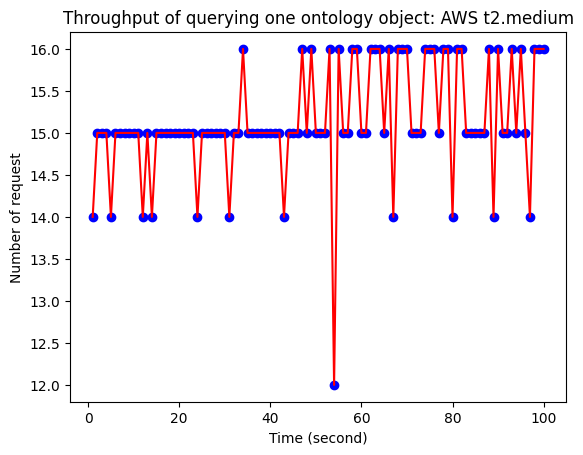

In [78]:
import matplotlib.pyplot as plt


# Create scatter plot
plt.scatter(x_b, result_b, color='blue', marker='o')
plt.plot(x_b, result_b, color='red')
# Add title and labels
plt.title("Throughput of querying one ontology object: AWS t2.medium")
plt.xlabel("Time (second)")
plt.ylabel("Number of request")

# Display the plot
plt.show()

3. network bandwidth

In [79]:
import threading
import time

In [80]:
time_list_b = []
def worker():
    search_results=get_json(REST_URL + "/search?q=" + term + "&ontologies="+ontology)["collection"]

In [81]:
def multi_threaded_method(num_threads):
    
    threads = []
    
    start_time = time.time()
    for i in range(num_threads):
        # Create a new thread and add it to the threads list
        thread = threading.Thread(target=worker)
        threads.append(thread)
        thread.start()

    # Wait for all threads to complete
    for thread in threads:
        thread.join()
    end_time = time.time()
    time_list_b.append(end_time - start_time)

In [82]:
thread_number_b = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
for i in thread_number_b:
    multi_threaded_method(i)

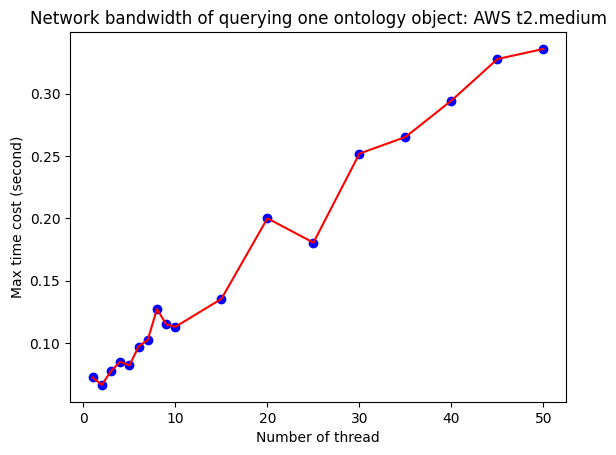

In [83]:
# Create scatter plot
plt.scatter(thread_number_b, time_list_b, color='blue', marker='o')
plt.plot(thread_number_b, time_list_b, color='red')
# Add title and labels
plt.title("Network bandwidth of querying one ontology object: AWS t2.medium")
plt.xlabel("Number of thread")
plt.ylabel("Max time cost (second)")

# Display the plot
plt.show()

* Compare the performance of m6a.large and t2.medium

1. Latency of querying one ontology object

m6a.large: 0.0629 second \
t2.medium:  0.0738 second

2. Throughput of querying one ontology object

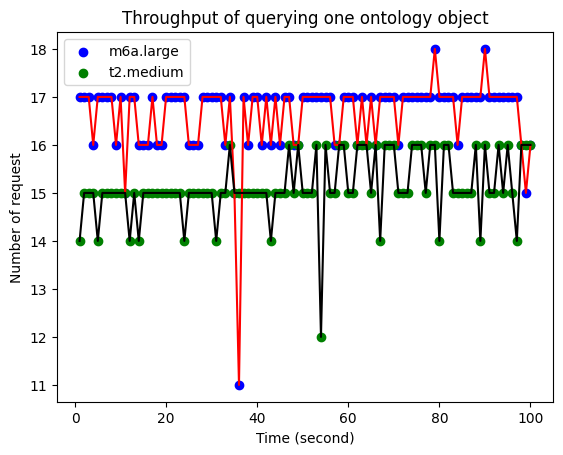

In [85]:
# Create scatter plot
plt.scatter(x_a, result_a, color='blue', marker='o', label = 'm6a.large')
plt.plot(x_a, result_a, color='red')

# Create scatter plot
plt.scatter(x_b, result_b, color='green', marker='o', label = 't2.medium')
plt.plot(x_b, result_b, color='black')
# Add title and labels
plt.title("Throughput of querying one ontology object")
plt.xlabel("Time (second)")
plt.ylabel("Number of request")
plt.legend()

# Display the plot
plt.show()

3. Network bandwidth

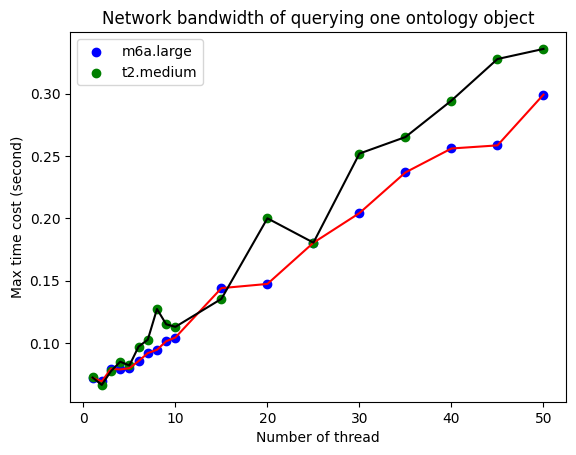

In [87]:
# Create scatter plot
plt.scatter(thread_number_a, time_list_a, color='blue', marker='o', label = 'm6a.large')
plt.plot(thread_number_a, time_list_a, color='red')

# Create scatter plot
plt.scatter(thread_number_b, time_list_b, color='green', marker='o', label = 't2.medium')
plt.plot(thread_number_b, time_list_b, color='black')
# Add title and labels
plt.title("Network bandwidth of querying one ontology object")
plt.xlabel("Number of thread")
plt.ylabel("Max time cost (second)")
plt.legend()
# Display the plot
plt.show()